<a href="https://colab.research.google.com/github/AmauryCazares/Alura-Store-Latam/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)




tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [ ]:
from urllib.request import urlopen
import csv

urls = [url, url2, url3, url4]

def leer_csv(url):
  datos = []
  with urlopen(url) as respuesta:
    lineas = respuesta.read().decode('utf-8').splitlines()
    lector= csv.DictReader(lineas)
    for fila in lector:
      datos.append(fila)
  return datos

Facturación Tienda 1: $1150880400.00
Facturación Tienda 2: $1116343500.00
Facturación Tienda 3: $1098019600.00
Facturación Tienda 4: $1038375700.00

Facturación total de todas las tiendas: $ 4403619200.00


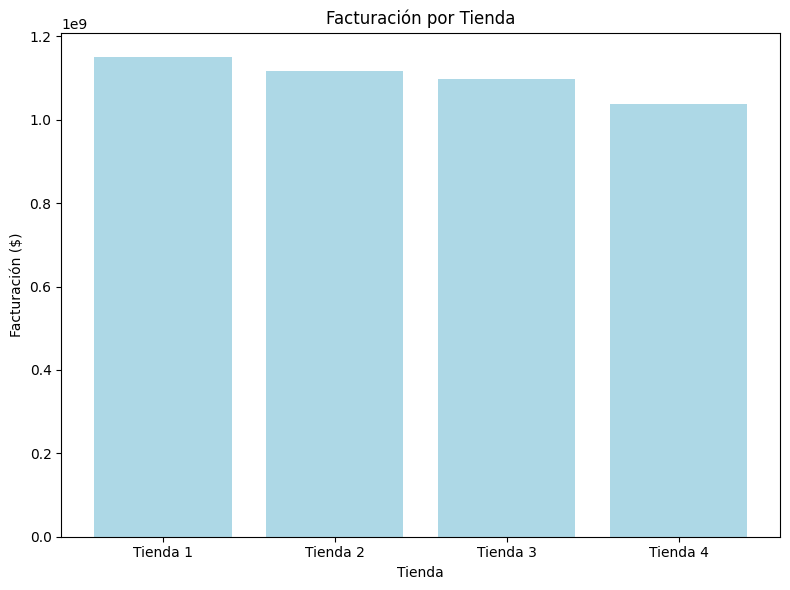

In [ ]:
total_facturacion = 0
facturaciones = []

# Procesar cada tienda
for i, url in enumerate(urls):
    datos_tienda = leer_csv(url)
    facturacion_tienda = 0

    for venta in datos_tienda:
        precio = float(venta['Precio'])
        facturacion_tienda += precio

    print(f"Facturación Tienda {i+1}: ${facturacion_tienda:.2f}")
    total_facturacion += facturacion_tienda
    facturaciones.append(facturacion_tienda)

print(f"\nFacturación total de todas las tiendas: $ {total_facturacion:.2f}")

# --- Gráfica de barras ---
nombres_tiendas = [f"Tienda {i+1}" for i in range(len(urls))]

plt.figure(figsize=(8, 6))
plt.bar(nombres_tiendas, facturaciones, color='lightblue')
plt.title('Facturación por Tienda')
plt.xlabel('Tienda')
plt.ylabel('Facturación ($)')
plt.tight_layout()
plt.show()

# 2. Ventas por categoría


Ventas por categoría en Tienda 1:
Categoría del Producto
Libros                       8784900.0
Artículos para el hogar     12698400.0
Juguetes                    17995700.0
Deportes y diversión        39290000.0
Instrumentos musicales      91299000.0
Muebles                    187633700.0
Electrodomésticos          363685200.0
Electrónicos               429493500.0
Name: Precio, dtype: float64


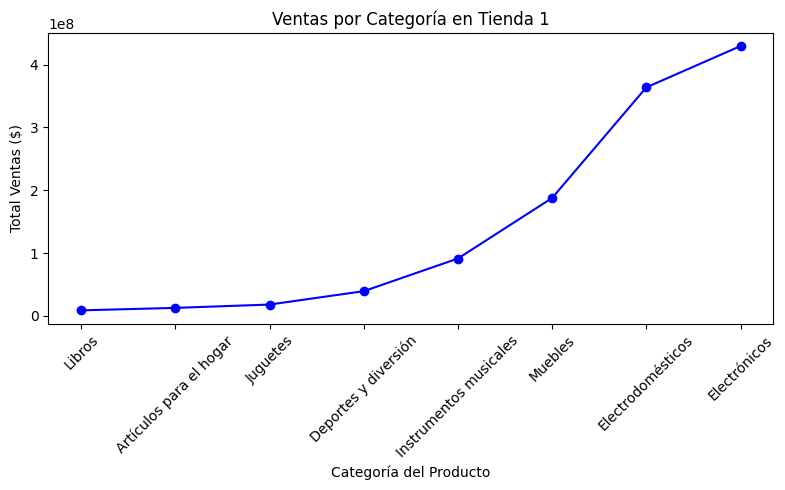


Ventas por categoría en Tienda 2:
Categoría del Producto
Libros                      10091200.0
Artículos para el hogar     14746900.0
Juguetes                    15945400.0
Deportes y diversión        34744500.0
Instrumentos musicales     104990300.0
Muebles                    176426300.0
Electrodomésticos          348567800.0
Electrónicos               410831100.0
Name: Precio, dtype: float64


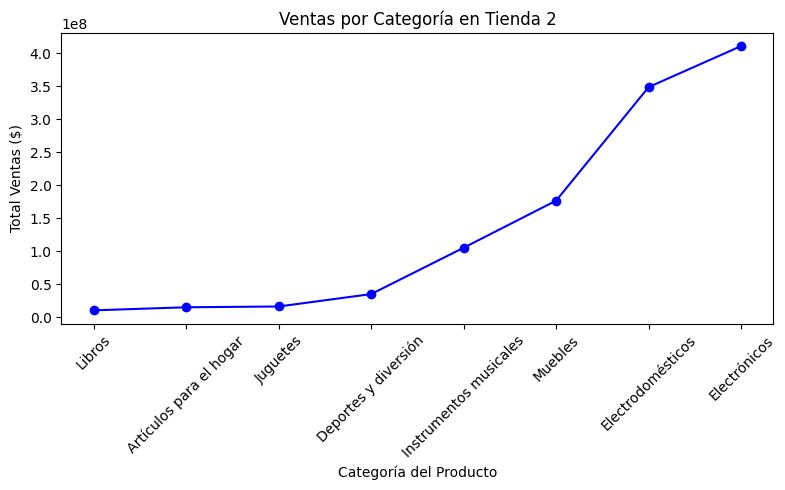


Ventas por categoría en Tienda 3:
Categoría del Producto
Libros                       9498700.0
Artículos para el hogar     15060000.0
Juguetes                    19401100.0
Deportes y diversión        35593100.0
Instrumentos musicales      77380900.0
Muebles                    201072100.0
Electrodomésticos          329237900.0
Electrónicos               410775800.0
Name: Precio, dtype: float64


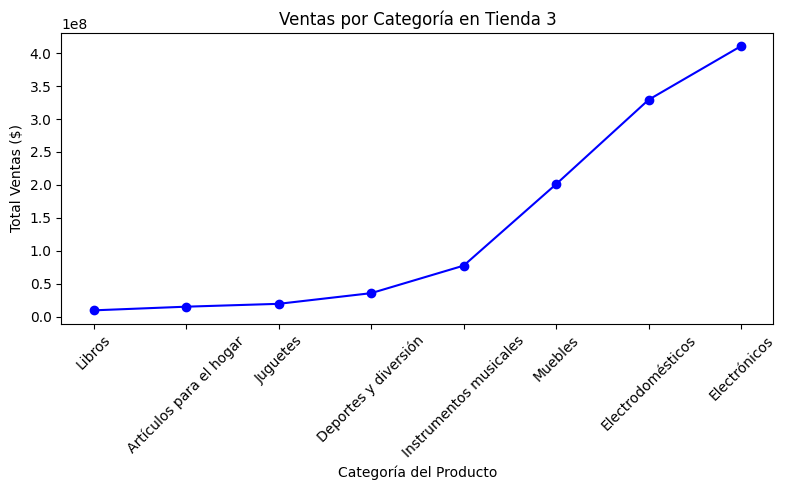


Ventas por categoría en Tienda 4:
Categoría del Producto
Libros                       9321300.0
Artículos para el hogar     15074500.0
Juguetes                    20262200.0
Deportes y diversión        33350100.0
Instrumentos musicales      75102400.0
Muebles                    192528900.0
Electrodomésticos          283260200.0
Electrónicos               409476100.0
Name: Precio, dtype: float64


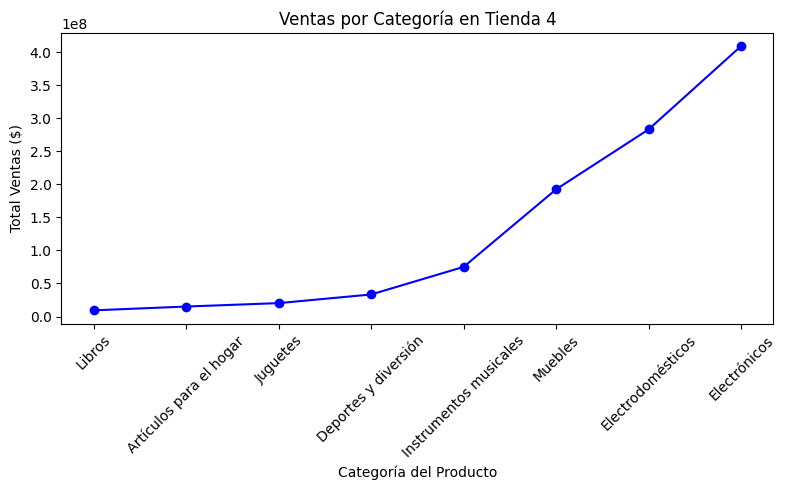

In [202]:
import matplotlib.pyplot as plt

def ventas_por_categoria(tienda, numero):
    # Agrupar por categoría y sumar precios
    ventas = tienda.groupby('Categoría del Producto')['Precio'].sum().sort_values()

    # Imprimir resultados
    print(f"\nVentas por categoría en Tienda {numero}:")
    print(ventas)

    # Graficar las ventas por categoría usando una gráfica de líneas
    plt.figure(figsize=(8, 5))  # Ajustar el tamaño de la figura
    ventas.plot(kind='line', marker='o', color='blue')  # Gráfico de líneas con marcadores en los puntos

    # Etiquetas y título
    plt.title(f'Ventas por Categoría en Tienda {numero}')
    plt.xlabel('Categoría del Producto')
    plt.ylabel('Total Ventas ($)')
    plt.xticks(rotation=45)  # Rotar etiquetas del eje X para mejor visualización
    plt.tight_layout()  # Ajustar automáticamente el espaciado

    # Mostrar la gráfica
    plt.show()

# Llamadas a la función para cada tienda
ventas_por_categoria(tienda, 1)
ventas_por_categoria(tienda2, 2)
ventas_por_categoria(tienda3, 3)
ventas_por_categoria(tienda4, 4)


# 3. Calificación promedio de la tienda


Calificación promedio de la Tienda 1: 3.98
Calificación promedio de la Tienda 2: 4.04
Calificación promedio de la Tienda 3: 4.05
Calificación promedio de la Tienda 4: 4.00


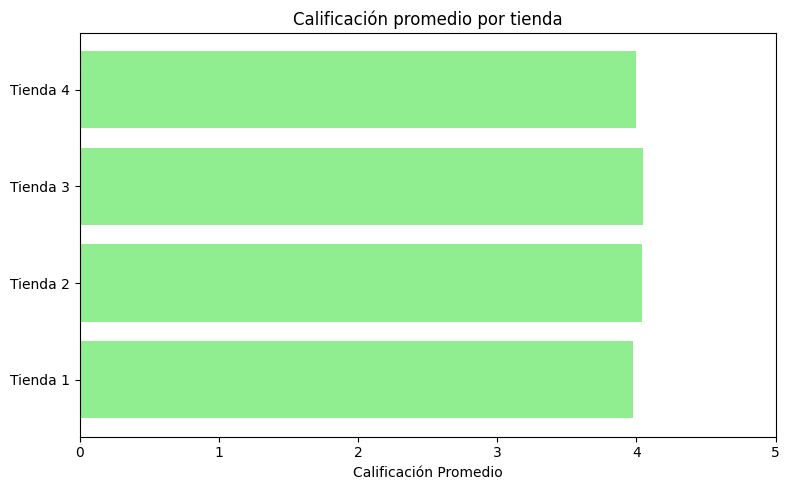

In [ ]:
import matplotlib.pyplot as plt

def leer_csv(url):
    datos = []
    with urlopen(url) as respuesta:
        lineas = respuesta.read().decode('utf-8').splitlines()
        lector = csv.DictReader(lineas)
        for fila in lector:
            datos.append(fila)
    return datos

promedios = []

for i, url in enumerate(urls):
    datos_tienda = leer_csv(url)
    suma_calificaciones = 0
    cantidad_productos = 0

    for producto in datos_tienda:
        try:
            calificacion = float(producto['Calificación'])
            suma_calificaciones += calificacion
            cantidad_productos += 1
        except (ValueError, KeyError):
            continue

    if cantidad_productos > 0:
        calificacion_promedio = suma_calificaciones / cantidad_productos
        print(f"Calificación promedio de la Tienda {i+1}: {calificacion_promedio:.2f}")
        promedios.append(calificacion_promedio)
    else:
        print(f"No se pudieron procesar calificaciones para la Tienda {i+1}")
        promedios.append(0)


tiendas = [f"Tienda {i+1}" for i in range(len(urls))]

plt.figure(figsize=(8, 5))
plt.barh(tiendas, promedios, color='lightgreen')
plt.xlabel('Calificación Promedio')
plt.title('Calificación promedio por tienda')
plt.xlim(0, 5)
plt.tight_layout()
plt.show()


# 4. Productos más y menos vendidos


Tienda 1
Productos más vendidos:
Producto
Microondas       60
TV LED UHD 4K    60
Armario          60
Name: count, dtype: int64

Productos menos vendidos:
Producto
Olla de presión              35
Auriculares con micrófono    33
Celular ABXY                 33
Name: count, dtype: int64


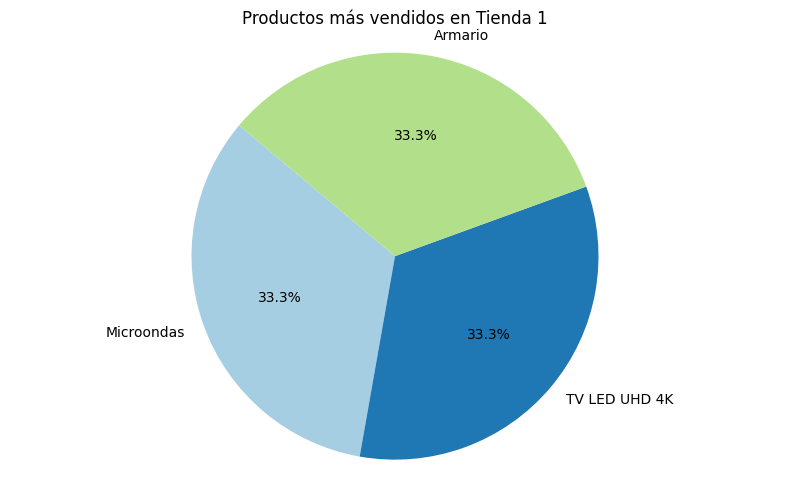

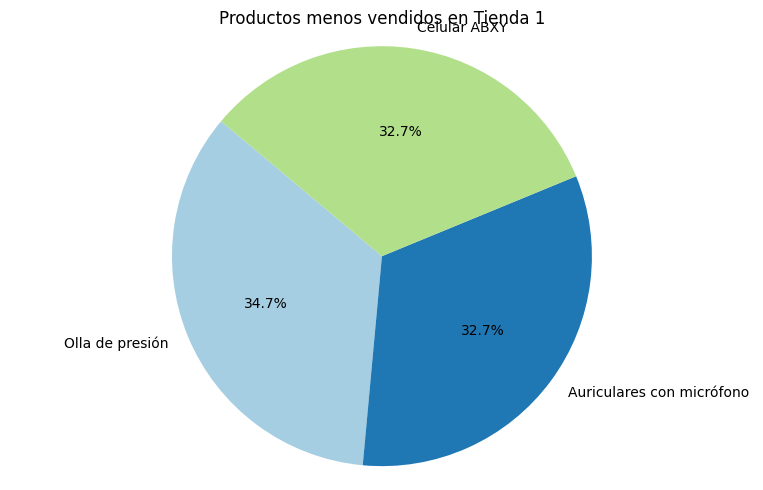


Tienda 2
Productos más vendidos:
Producto
Iniciando en programación    65
Microondas                   62
Batería                      61
Name: count, dtype: int64

Productos menos vendidos:
Producto
Mesa de comedor    34
Impresora          34
Juego de mesa      32
Name: count, dtype: int64


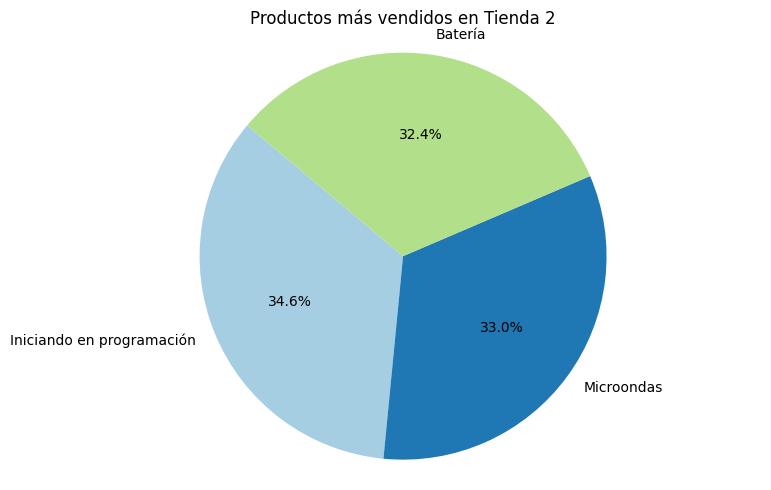

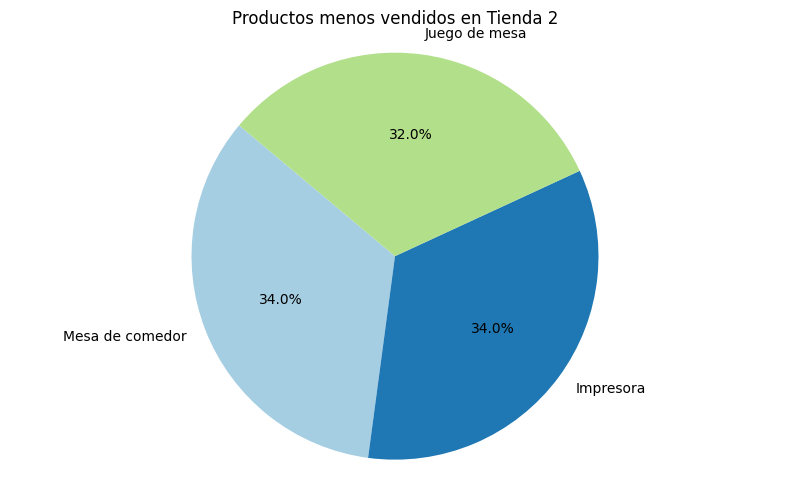


Tienda 3
Productos más vendidos:
Producto
Kit de bancas      57
Mesa de comedor    56
Cama king          56
Name: count, dtype: int64

Productos menos vendidos:
Producto
Mochila                    36
Microondas                 36
Bloques de construcción    35
Name: count, dtype: int64


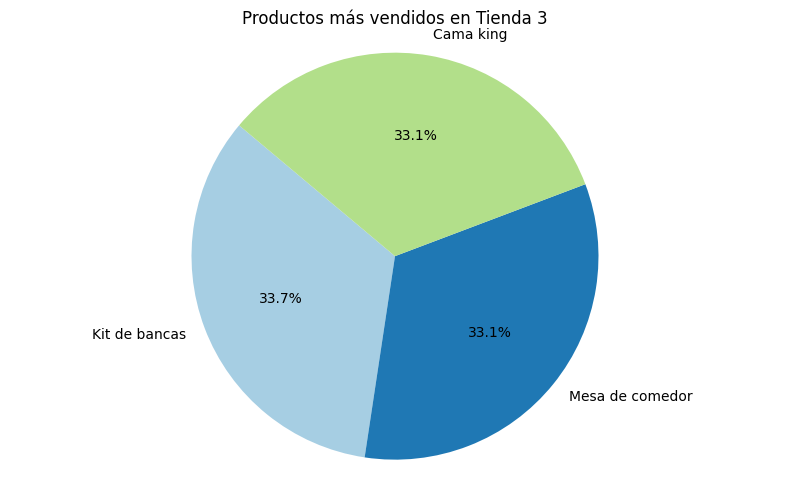

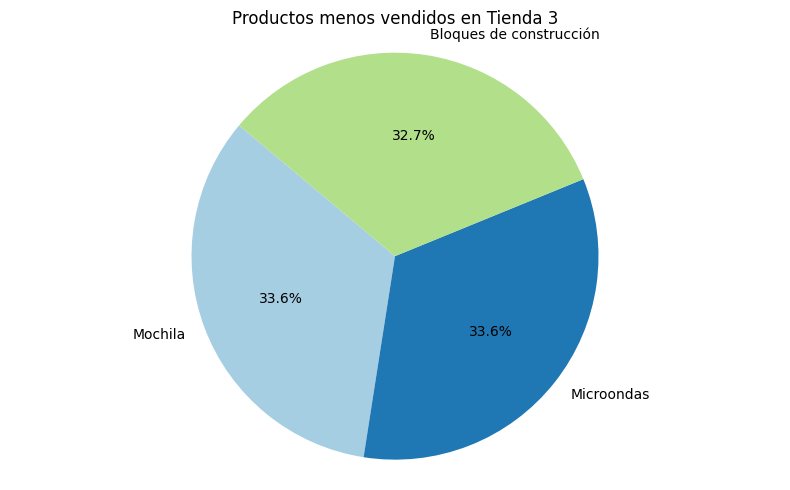


Tienda 4
Productos más vendidos:
Producto
Cama box                   62
Cubertería                 59
Dashboards con Power BI    56
Name: count, dtype: int64

Productos menos vendidos:
Producto
Guitarra acústica     37
Armario               34
Guitarra eléctrica    33
Name: count, dtype: int64


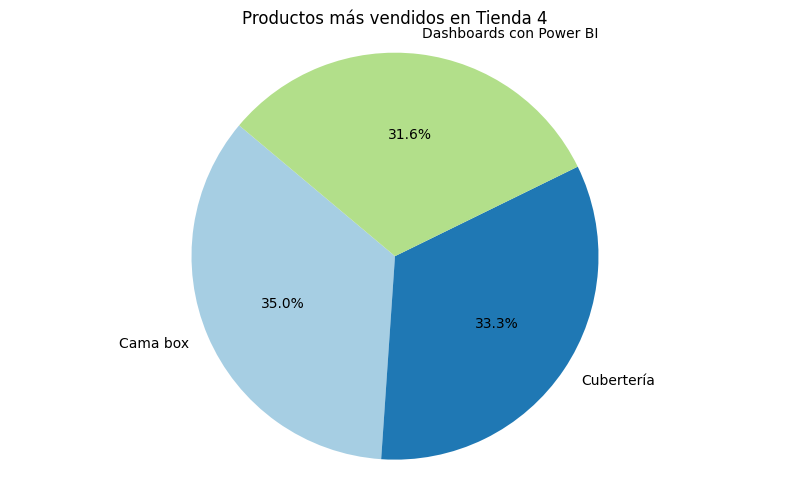

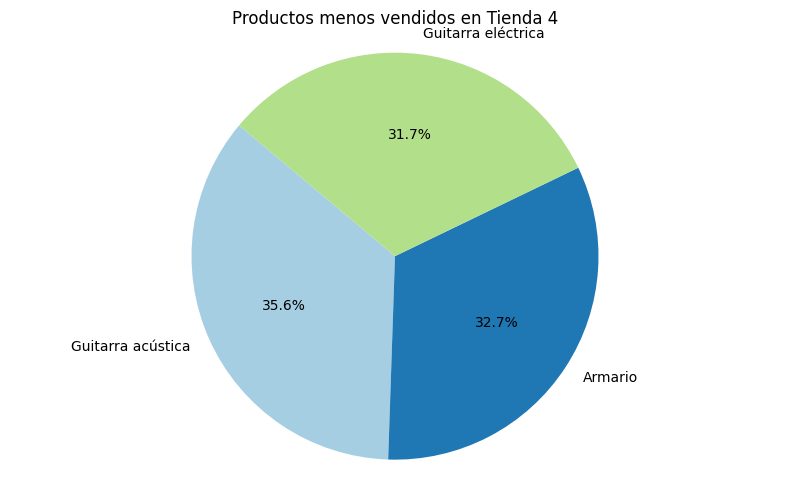

In [181]:
import matplotlib.pyplot as plt

# Lista de tiendas
tiendas = [tienda, tienda2, tienda3, tienda4]

for i, t in enumerate(tiendas, start=1):
    # Obtener los productos más vendidos (top 3)
    productos_mas_vendidos = t["Producto"].value_counts().head(3)
    # Obtener los productos menos vendidos (últimos 3)
    productos_menos_vendidos = t["Producto"].value_counts().tail(3)

    # Mostrar los resultados en consola
    print(f"\nTienda {i}")
    print(f"Productos más vendidos:\n{productos_mas_vendidos}")
    print(f"\nProductos menos vendidos:\n{productos_menos_vendidos}")

    # Gráfico de pastel para los productos más vendidos
    plt.figure(figsize=(8, 5))
    plt.pie(productos_mas_vendidos, labels=productos_mas_vendidos.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
    plt.title(f'Productos más vendidos en Tienda {i}')
    plt.axis('equal')  # Para hacer que el gráfico sea circular
    plt.tight_layout()
    plt.show()

    # Gráfico de pastel para los productos menos vendidos
    plt.figure(figsize=(8, 5))
    plt.pie(productos_menos_vendidos, labels=productos_menos_vendidos.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
    plt.title(f'Productos menos vendidos en Tienda {i}')
    plt.axis('equal')  # Para hacer que el gráfico sea circular
    plt.tight_layout()
    plt.show()

# 5. Envío promedio por tienda

Envios promedio de la Tienda 1: 23459.457167090754
Envios promedio de la Tienda 2: 25216.235693090293
Envios promedio de la Tienda 3: 24805.680373039424
Envios promedio de la Tienda 4: 23459.457167090754


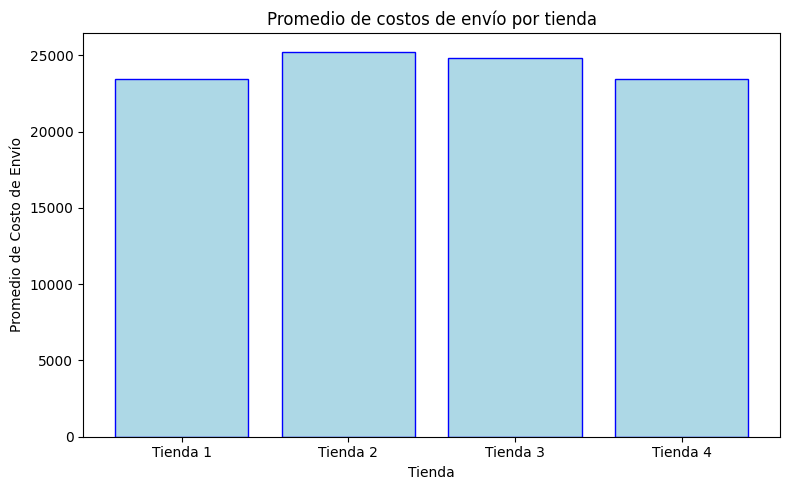

In [200]:
import matplotlib.pyplot as plt



# Lista para almacenar los promedios de los costos de envío por tienda
promedios_envios = []

for i, url in enumerate(urls):
    datos_tienda = leer_csv(url)
    suma_envios = 0
    cantidad_productos = 0

    # Calcular el promedio de los costos de envío
    for producto in datos_tienda:
        try:
            suma_envios += float(producto['Costo de envío'])  # Sumar correctamente los costos de envío
            cantidad_productos += 1
        except (ValueError, KeyError) as e:
            if isinstance(e, KeyError):
                raise
            continue  # Continuar en caso de error

    if cantidad_productos > 0:
        envios_promedio = suma_envios / cantidad_productos
        promedios_envios.append(envios_promedio)
        print(f"Envios promedio de la Tienda {i+1}: {envios_promedio}")
    else:
        print(f"No se pudieron procesar envíos para la tienda {i+1}")

# Graficar los resultados con una gráfica de barras para todas las tiendas en una sola
plt.figure(figsize=(8, 5))
plt.bar(range(1, len(urls) + 1), promedios_envios, color='lightblue', edgecolor='blue')

# Etiquetas y título
plt.title('Promedio de costos de envío por tienda')
plt.xlabel('Tienda')
plt.ylabel('Promedio de Costo de Envío')
plt.xticks(range(1, len(urls) + 1), [f'Tienda {i+1}' for i in range(len(urls))])
plt.tight_layout()

# Mostrar el gráfico
plt.show()



Promedio de Envios de Tienda 1: 26018.61

Promedio de Envios de Tienda 2: 25216.24

Promedio de Envios de Tienda 3: 24805.68

Promedio de Envios de Tienda 4: 23459.46
